In [ ]:
!pip install arch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.0/908.0 KB 9.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from arch.unitroot import PhillipsPerron
from arch import arch_model

In [ ]:
df=pd.read_csv("euro.csv") #loading the file 

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y') #converting date column "str" to "datetime" object
df.set_index('Date', inplace=True)

In [ ]:
df.head(5) #printing top-5 data on the table

,EURO
Date,
2016-04-04,75.3713
2016-04-05,75.5240
2016-04-06,75.6290
2016-04-07,75.8952
2016-04-11,75.7538


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 788 entries, 2016-04-04 to 2023-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EURO    788 non-null    float64
dtypes: float64(1)
memory usage: 12.3 KB


In [ ]:
df.describe() # prinitng basic Data statistics 

,EURO
count,788.000000
mean,77.765828
std,5.069230
min,68.250300
25%,74.216875
50%,76.521850
75%,80.691400
max,90.255500


<Axes: xlabel='Date'>

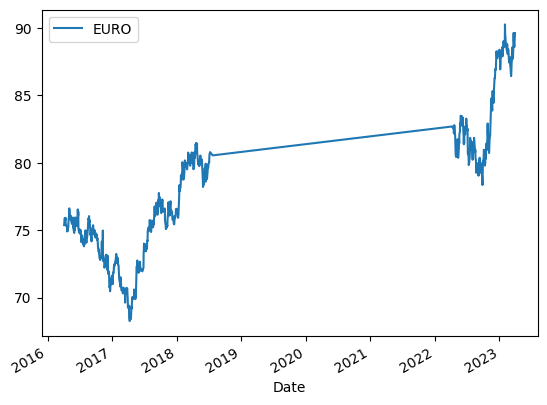

In [ ]:
df.plot()

### Filtering data for range April-2016 till April-2018

In [ ]:
mmr1= df.loc['2022-1-1':'2023-1-1'] #filtering data for 2022-1-1 till 2023-1-1

<Axes: xlabel='Date'>

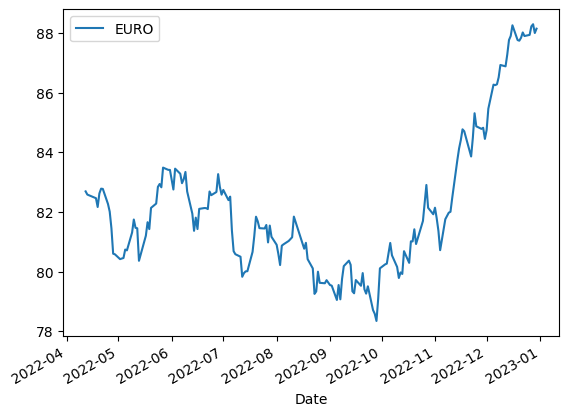

In [ ]:
mmr1.plot()

## Statistical test

### 1. Augmented Dickey-Fuller test

In [ ]:
result = adfuller(mmr1) #augmented Dickey-Fuller test
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.070607
p-value: 0.952289
Critical Values:
	1%: -3.468
	5%: -2.878
	10%: -2.576


### 2. Phillips Perron test

In [ ]:
PhillipsPerron(mmr1)

Test Statistic,0.083
P-value,0.965
Lags,14


Since ADF test statistic is negative and p-value is higher we cannot reject the null of unit root and PP test is rehecting the null hypothesis, hence data is non-stationary

time series is not stationary and will require differencing to make it stationary, at least a difference order of 1.

### First Difference of mmr1

In [ ]:
dmmr1 = mmr1.diff()

In [ ]:
dmmr1.iloc[0]=mmr1.iloc[0]

In [ ]:
result = adfuller(dmmr1)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.422414
p-value: 0.000271
Critical Values:
	1%: -3.470
	5%: -2.879
	10%: -2.576


In [ ]:
PhillipsPerron(dmmr1)

Test Statistic,-191.279
P-value,0.000
Lags,14


### After taking first diffrenec the data is stationary

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib import pyplot

### Plotting Auto-correlation function

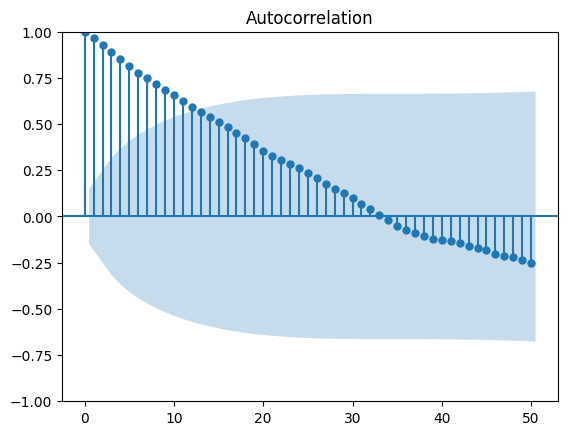

In [ ]:
plot_acf(mmr1,lags=50) #plotting autocorrelation at First Difference 
pyplot.show()

We are getting positive auto-correlation at 30th lagsignificant for the first 10 lags.

A good starting point for the AR parameter of the model may be 10

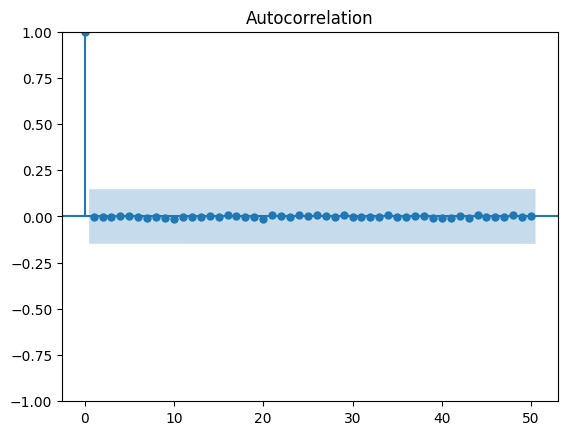

In [ ]:
plot_acf(dmmr1,lags=50) #plotting autocorelation of first difference
pyplot.show()

### Plotting Partial Auto-Correlation function

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


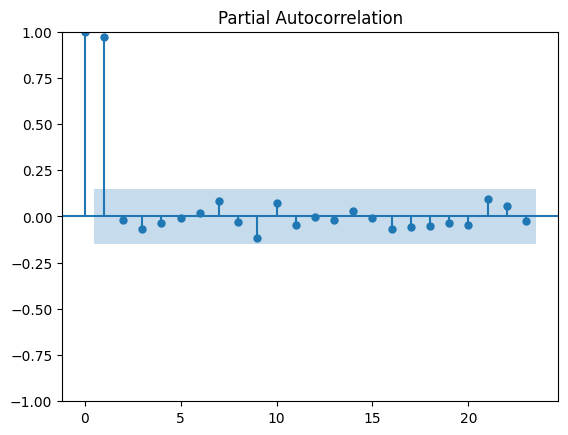

In [ ]:
plot_pacf(mmr1) #partial Autocorrelation of actual series
pyplot.show()

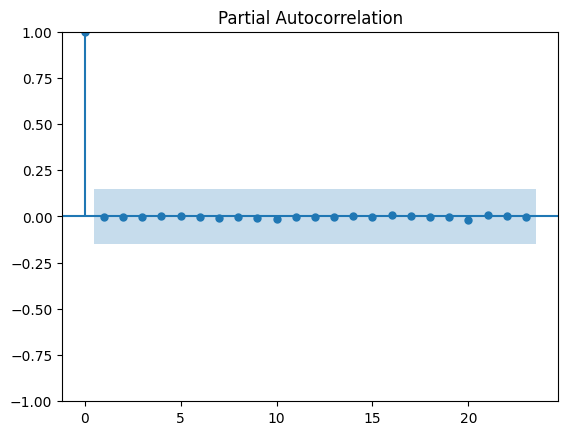

In [ ]:
plot_pacf(dmmr1) #Partial Auto-Correlation of First Difference
pyplot.show()

Since ACF plot shows that Auto-correlation is dropping immediately after first lag and we can use ARIM 

# ARCH Models

In [ ]:
from statsmodels.tsa.arima.model import ARIMA #loading ARIMA model in python

Iteration:      1,   Func. Count:     13,   Neg. LLF: 978.8489908531242
Iteration:      2,   Func. Count:     26,   Neg. LLF: 19362.680313696295
Iteration:      3,   Func. Count:     39,   Neg. LLF: 15837.030530720842
Iteration:      4,   Func. Count:     52,   Neg. LLF: 3545.6860535540764
Iteration:      5,   Func. Count:     65,   Neg. LLF: 19362.864635978334
Iteration:      6,   Func. Count:     78,   Neg. LLF: 19322.132427675333
Iteration:      7,   Func. Count:     91,   Neg. LLF: 12375.85408320345
Iteration:      8,   Func. Count:    104,   Neg. LLF: 19567.490825647365
Iteration:      9,   Func. Count:    117,   Neg. LLF: 19362.866049820586
Iteration:     10,   Func. Count:    130,   Neg. LLF: 19362.866049820586
Iteration:     11,   Func. Count:    143,   Neg. LLF: 25365130.032917235
Iteration:     12,   Func. Count:    156,   Neg. LLF: 49193.58459300518
Iteration:     13,   Func. Count:    169,   Neg. LLF: 29207.798390253796
Iteration:     14,   Func. Count:    182,   Neg. LLF: 

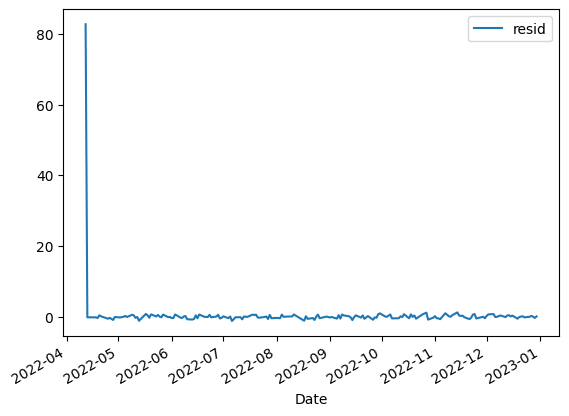

In [ ]:
model = arch_model(dmmr1, mean='Zero', vol='ARCH', p=10)
model_fit = model.fit() # model fitting 
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

## First period ahead value Forcasting for Feb-2023

In [ ]:
test = df.loc['2023-1-1':'2023-1-15'][:10]
test.head(10)

,EURO
Date,
2023-01-02,88.3753
2023-01-03,88.2508
2023-01-04,87.6546
2023-01-05,87.7992
2023-01-06,86.9235
2023-01-09,87.9528
2023-01-10,88.2829
2023-01-11,87.8551
2023-01-12,87.9566


In [130]:
forecasts=model_fit.forecast(horizon=1, reindex=False)
print(forecasts.residual_variance.iloc[-3:])

                 h.1
Date                
2022-12-30  0.146239


In [132]:
forecasts.residual_variance.iloc[-3:]['h.1'].to_list()[0]

0.1462390004497691

In [139]:
residual_1 = []
residual_2 = []
for i in range(0,10): #Rolling Forecast ARCH model
  mmr1= df.loc['2022-1-1':f'2023-1-{1+i}'] 
  dmmr1 = mmr1.diff()
  dmmr1.iloc[0]=mmr1.iloc[0]
  # # fit model
  model = arch_model(dmmr1, mean='Zero', vol='ARCH', p=5) #-> ARCH model 1
  model_fit = model.fit()
  forecasts1=model_fit.forecast(horizon=1, reindex=False)

  residual_1.append(forecasts1.residual_variance.iloc[-3:]['h.1'].to_list()[0]) #First period ahead forecast for Model1 

  #prediction by model 2
  model2 = arch_model(dmmr1, mean='Zero', vol='ARCH', p=10) #-> ARCH model 2
  model_fit2 = model2.fit()
  forecasts2=model_fit2.forecast(horizon=1, reindex=False)

  residual_2.append(forecasts2.residual_variance.iloc[-3:]['h.1'].to_list()[0]) #First period ahead forecast for Model2
  
  

Iteration:      1,   Func. Count:      8,   Neg. LLF: 688.1309913357711
Iteration:      2,   Func. Count:     16,   Neg. LLF: 19362.866049703756
Iteration:      3,   Func. Count:     24,   Neg. LLF: 19082.030418702074
Iteration:      4,   Func. Count:     32,   Neg. LLF: 19362.866049703756
Iteration:      5,   Func. Count:     40,   Neg. LLF: 159.54537503293182
Iteration:      6,   Func. Count:     47,   Neg. LLF: 265.77838861556364
Iteration:      7,   Func. Count:     58,   Neg. LLF: 18540.39973847478
Iteration:      8,   Func. Count:     66,   Neg. LLF: 142.48988627605252
Iteration:      9,   Func. Count:     72,   Neg. LLF: 142.49008627817295
Optimization terminated successfully    (Exit mode 0)
            Current function value: 142.48988627605252
            Iterations: 13
            Function evaluations: 72
            Gradient evaluations: 9
Iteration:      1,   Func. Count:     13,   Neg. LLF: 978.8489908531242
Iteration:      2,   Func. Count:     26,   Neg. LLF: 19362.6803

/usr/local/lib/python3.9/dist-packages/arch/univariate/base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:     24,   Func. Count:    312,   Neg. LLF: 141.05823651234448
Iteration:     25,   Func. Count:    323,   Neg. LLF: 141.0581148911645
Optimization terminated successfully    (Exit mode 0)
            Current function value: 141.05823651234448
            Iterations: 29
            Function evaluations: 323
            Gradient evaluations: 25
Iteration:      1,   Func. Count:      8,   Neg. LLF: 695.5177962121155
Iteration:      2,   Func. Count:     16,   Neg. LLF: 19378.608788405763
Iteration:      3,   Func. Count:     24,   Neg. LLF: 19225.03880864581
Iteration:      4,   Func. Count:     32,   Neg. LLF: 6910.487266568812
Iteration:      5,   Func. Count:     40,   Neg. LLF: 168.91580213277695
Iteration:      6,   Func. Count:     47,   Neg. LLF: 277.85075341602806
Iteration:      7,   Func. Count:     58,   Neg. LLF: 17741.73361487324
Iteration:      8,   Func. Count:     66,   Neg. LLF: 144.67528381178664
Iteration:      9,   Func. Count:     72,   Neg. LLF: 144.675481

In [140]:
test['Model 1 predicted']=test['EURO']+residual_1
test['Model 2 predicted']=test['EURO']+residual_2

In [141]:
test

,EURO,Model 1 predicted,Model 2 predicted
Date,,,
2023-01-02,88.3753,88.553317,88.521539
2023-01-03,88.2508,88.437938,88.384635
2023-01-04,87.6546,87.831894,87.791520
2023-01-05,87.7992,88.128233,88.262203
2023-01-06,86.9235,87.098801,87.115259
2023-01-09,87.9528,88.572730,88.644720
2023-01-10,88.2829,88.902830,88.974820
2023-01-11,87.8551,88.475030,88.547020
2023-01-12,87.9566,88.741521,88.620423


In [143]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(test['EURO'],test['Model 1 predicted']) #MSPE for ARCH Model 1

0.004476541832959443

In [144]:
mean_absolute_percentage_error(test['EURO'],test['Model 2 predicted']) #MSPE for ARCH Model 2

0.004590856538003515

In [145]:
!pip install dieboldmariano

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Debol Mariano Test

In [146]:
from dieboldmariano import dm_test

In [148]:
dm_test(test["EURO"], test['Model 1 predicted'], test['Model 2 predicted'], one_sided=True)

(-0.6271153276408591, 0.27308072449981224)

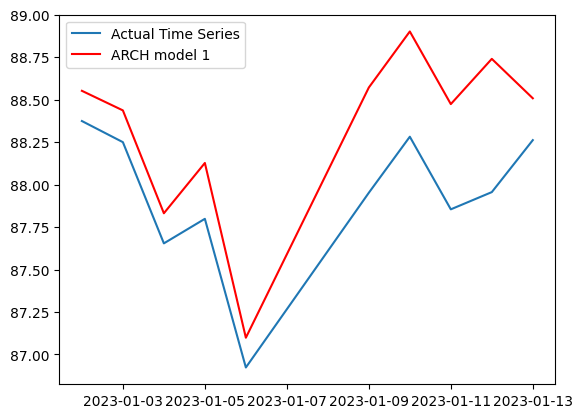

In [150]:
import matplotlib.pyplot as plt
plt.plot(test['EURO'],label="Actual Time Series")
plt.plot(test['Model 1 predicted'], color='red',label="ARCH model 1")
plt.legend()